In [25]:
%load_ext autoreload
%autoreload 2

import logging

from data_handler import DataHandler

import alphatools as at
from alphatools.pl.figure import AxisManager, create_figure, label, save_figure
from alphatools.pl.plots import Plots

logging.basicConfig(level=logging.INFO)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Basic EDA on a synthetic example dataset:

1. Generate example data
2. Filter for data completeness on sample level
3. Visualize samples as histograms
4. Save data

In [26]:
output_directory = "./example_outputs/03_basic_workflow/"

### Generate an example dataset as an anndata.AnnData instance

In [27]:
adata = DataHandler("synthetic_3x2").get_data()

print("The numeric data in the anndata object:")
display(adata.to_df().head())

print("The sample-level metadata in the anndata object:")
display(adata.obs.head())

print("The feature-level metadata in the anndata object:")
display(adata.var.head())

The numeric data in the anndata object:


,gene_0,gene_1,gene_2
cell_0,NaN,5.883151,7.630818
cell_1,0.400157,2.652241,7.760621
cell_2,NaN,2.729515,9.099660
cell_3,2.240893,4.969397,8.655264
cell_4,NaN,2.826877,8.640132


The sample-level metadata in the anndata object:


,celltype
cell_0,A
cell_1,A
cell_2,A
cell_3,A
cell_4,A


The feature-level metadata in the anndata object:


,alternative_name
gene_0,G0
gene_1,G1
gene_2,G2


### Filter by data completeness:

Remove features which have more than the allowed fraction of missing values

In [28]:
# filter out features with more than 25 % missing values
adata = at.pp.filter_data_completeness(
    adata=adata,
    max_missing=0.25,
    axis=1,
)

print("The numeric data in the anndata object:")
display(adata.to_df().head())

print("The sample-level metadata in the anndata object:")
display(adata.obs.head())

print("The feature-level metadata in the anndata object:")
display(adata.var.head())

The numeric data in the anndata object:


,gene_1,gene_2
cell_0,5.883151,7.630818
cell_1,2.652241,7.760621
cell_2,2.729515,9.099660
cell_3,4.969397,8.655264
cell_4,2.826877,8.640132


The sample-level metadata in the anndata object:


,celltype
cell_0,A
cell_1,A
cell_2,A
cell_3,A
cell_4,A


The feature-level metadata in the anndata object:


,alternative_name
gene_1,G1
gene_2,G2


### Visualize the distribution of values in different levels of an observational metadata variable

In this example, check the distribution of "gene_1" expression values per cell type.

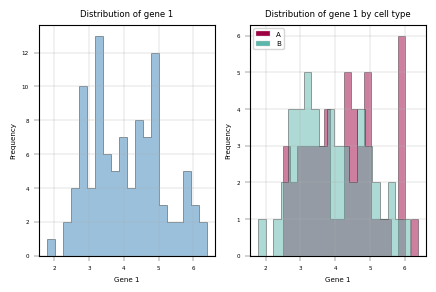

In [29]:
# Apply the AxisManager to make axes iterable and apply consistent AlphaTools styling.
# Axes can also be accessed directly by indexing the axm object.
fig, axs = create_figure(nrows=1, ncols=2, figsize=(5, 3))
axm = AxisManager(axs)

# Plot.histogram handles adata natively. Columns from the data and metadata are accessible
# Focus on the distribution of cell types in gene_1
ax = axm.next()
Plots.histogram(
    data=adata,
    value_column="gene_1",
    bins=20,
    legend="auto",
    ax=ax,
    hist_kwargs={"alpha": 0.5, "histtype": "stepfilled", "linewidth": 0.5, "edgecolor": "black"},
)
label(ax, "Gene 1", "Frequency", "Distribution of gene 1")

# Focus on the distribution of cell types in gene_1
ax = axm.next()
Plots.histogram(
    data=adata,
    value_column="gene_1",
    color_column="celltype",
    bins=20,
    legend="auto",
    ax=ax,
    hist_kwargs={"alpha": 0.5, "histtype": "stepfilled", "linewidth": 0.5, "edgecolor": "black"},
)
label(ax, "Gene 1", "Frequency", "Distribution of gene 1 by cell type")

# save figure
save_figure(
    fig=fig,
    filename="sample_histogram.png",
    output_dir=output_directory,
    dpi=300,
    transparent=False,
)